In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.pairwise import manhattan_distances

In [2]:
df = pd.read_csv('/content/top10s.csv', encoding='latin-1')
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [3]:
df.isnull().sum()

,0
Unnamed: 0,0
title,0
artist,0
top genre,0
year,0
bpm,0
nrgy,0
dnce,0
dB,0
live,0


In [4]:
df['title'] = df['title'].str.lower()
df['artist'] = df['artist'].str.lower()
df['top genre'] = df['top genre'].str.lower()

In [6]:
numerical_columns = ['Unnamed: 0', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']
existing_numerical_columns = [col for col in numerical_columns if col in df.columns]
scaler = StandardScaler()
df[existing_numerical_columns] = scaler.fit_transform(df[existing_numerical_columns])

<ipython-input-7-a0c11b0b7fa0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='pop', estimator='mean', ci=None)


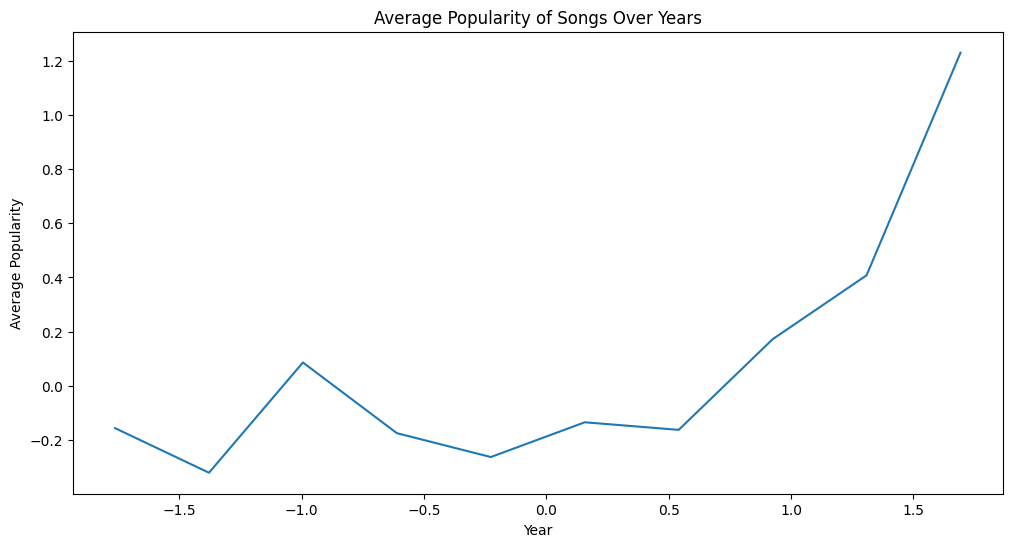

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='pop', estimator='mean', ci=None)
plt.title("Average Popularity of Songs Over Years")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.show()

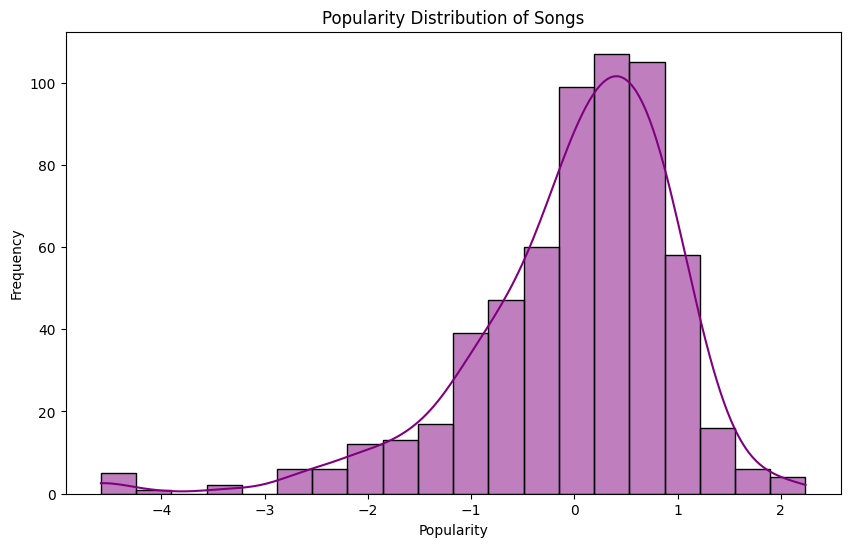

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['pop'], bins=20, kde=True, color='purple')
plt.title("Popularity Distribution of Songs")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()


In [9]:

num_users = 100
user_ids = [f"user_{i+1}" for i in range(num_users)]

np.random.seed(42)
user_interactions = pd.DataFrame({
    'user_id': np.random.choice(user_ids, size=1000),
    'song': np.random.choice(df['title'], size=1000),
    'rating': np.random.randint(1, 6, size=1000)
})

user_interactions = user_interactions.merge(df[['title', 'pop']], left_on='song', right_on='title', how='inner').drop(columns=['title'])
user_interactions.head()


,user_id,song,rating,pop
0,user_52,imma be,4,-0.311652
1,user_93,into you,3,0.929239
2,user_15,no guidance (feat. drake),5,0.998178
3,user_72,want to,4,0.033040
4,user_61,change,3,-0.863159


In [10]:
user_item_matrix = user_interactions.pivot_table(index='user_id', columns='song', values='rating').fillna(0)
user_item_matrix.head()

song,#beautiful,...ready for it? - bloodpop® remix,1+1,24k magic,2u (feat. justin bieber),3,43776,7 years,a little party never killed nobody (all we got),a sky full of stars,...,worth it,wrecking ball,written in the stars (feat. eric turner),wtf (where they from),xo,you and i,young girls,younger now,your love is my drug,youth (feat. khalid)
user_id,,,,,,,,,,,,,,,,,,,,,
user_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train_data, test_data = train_test_split(user_interactions, test_size=0.2, random_state=42)
train_matrix = train_data.pivot_table(index='user_id', columns='song', values='rating').fillna(0)
test_matrix = test_data.pivot_table(index='user_id', columns='song', values='rating').fillna(0)


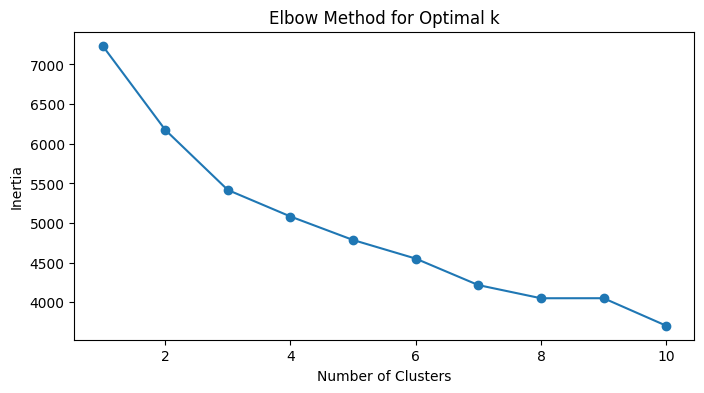

In [12]:
existing_numerical_columns = [col for col in numerical_columns if col in df.columns]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[existing_numerical_columns])

inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [13]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(scaled_features)

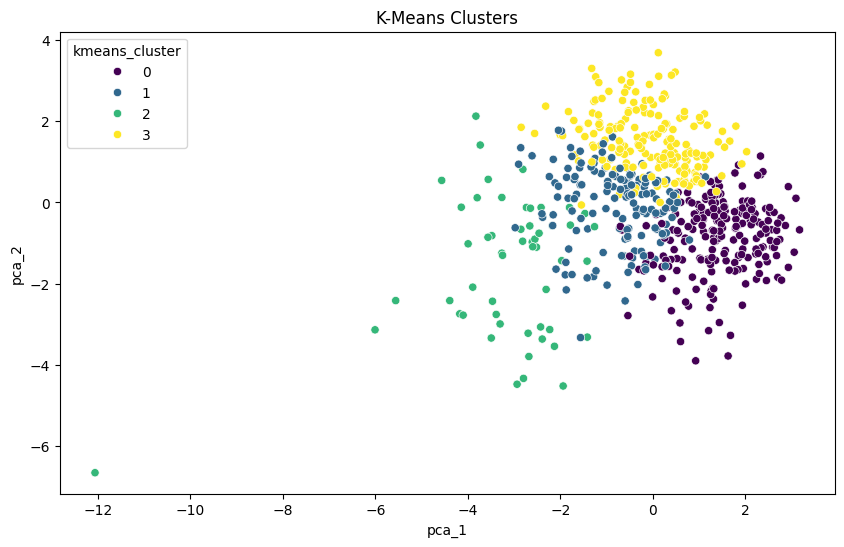

In [14]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

df['pca_1'] = pca_features[:, 0]
df['pca_2'] = pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='kmeans_cluster', palette='viridis')
plt.title("K-Means Clusters")
plt.show()

In [15]:
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.1256726673339554


In [16]:
dbi = davies_bouldin_score(scaled_features, cluster_labels)
print(f"Davies-Bouldin Index: {dbi}")

Davies-Bouldin Index: 2.0115021707128258


In [17]:
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42, metric='euclidean')
df['kmedoids_cluster'] = kmedoids.fit_predict(scaled_features)

In [18]:
kmedoids_cluster_labels = df['kmedoids_cluster']

silhouette_avg = silhouette_score(scaled_features, kmedoids_cluster_labels)
print(f"Silhouette Score (K-Medoids): {silhouette_avg}")

dbi = davies_bouldin_score(scaled_features, kmedoids_cluster_labels)
print(f"Davies-Bouldin Index (K-Medoids): {dbi}")

Silhouette Score (K-Medoids): 0.05823699196760083
Davies-Bouldin Index (K-Medoids): 2.6726809219936962


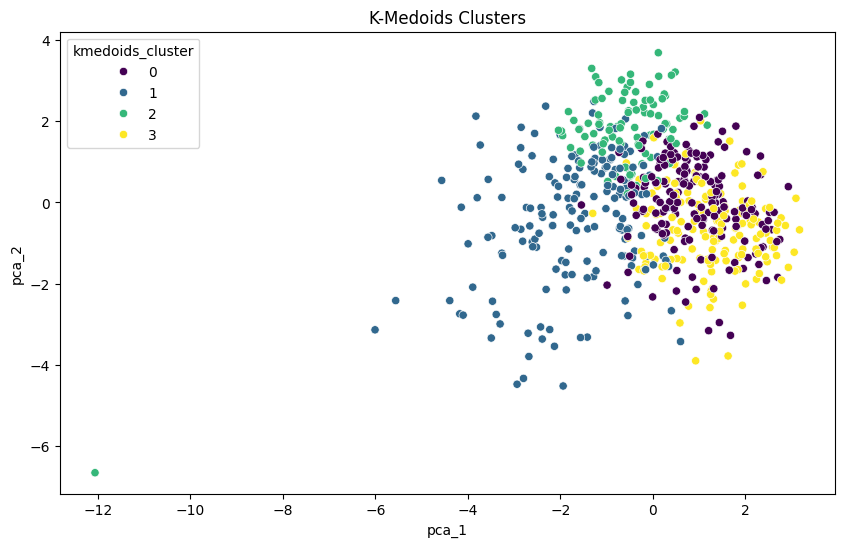

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='kmedoids_cluster', palette='viridis')
plt.title("K-Medoids Clusters")
plt.show()

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(train_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=train_matrix.columns, columns=train_matrix.columns)

def recommend_songs(song_name, num_recommendations=5):
    if song_name not in item_similarity_df.index:
        return "Song not found in the dataset."

    similar_songs = item_similarity_df[song_name].sort_values(ascending=False)[1:num_recommendations + 1]
    return similar_songs.index.tolist()

recommend_songs('hey, soul sister', num_recommendations=5)


['dusk till dawn - radio edit',
 'happy - from "despicable me 2"',
 'wiggle (feat. snoop dogg)',
 'reality - radio edit',
 'not myself tonight']